### Investigate 3298 null values in response_correctness

In [10]:
%run '../lib/libraries.ipynb'

dython              0.6.1
tinydb              4.2.0


You should consider upgrading via the '/Users/duane.hinkley/PycharmProjects/c772-capstone-project/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/duane.hinkley/PycharmProjects/c772-capstone-project/venv/bin/python -m pip install --upgrade pip' command.


In [11]:
dfFlt = load_df('dfFlt')

###### Select the  3298 null values in response_correctness

In [12]:
rcNullDf = dfFlt.filter(F.col('response_correctness').isNull() )

###### Display Distinct Values

In [13]:
distinct_val(rcNullDf)

,0
assignment_max_attempts,1
assignment_late_submission,False
assignment_attempt_number,1
is_manual_scoring_required,False
item_is_offline_scored,False
learner_attempt_status,fully scored
scoring_type_code,[unassigned]
raw_score,NaN
response_correctness,None
is_deleted,False


- New Distinct values
  - Values
    - item_is_offline_scored = False (scored automatically)
    - scoring_type_code = "[unassigned]" (scored manually by human)
      - "[unassigned]" is an unexpected value possibly indicating a automated scoring anomaly
    - response_correctness = "None" (actually null)
    - raw_score is also null
  - Many values indicate the item not attempted


###### Display Attempt Categorical / Identifiers

In [21]:
types = get_var_types()

for f in [
    'assessment_instance_attempt_id',
    'assessment_item_response_id',
]:
  print(f)
  rcNullDf.agg(
    F.countDistinct(f).alias('unique'),
    F.count(F.when(F.col(f).isNull(), f)).alias('null')
  ).show()


assessment_instance_attempt_id
+------+----+
|unique|null|
+------+----+
|    14|3264|
+------+----+

assessment_item_response_id
+------+----+
|unique|null|
+------+----+
|    24|3264|
+------+----+



- Indicate items not attempted
  - 3264 of the 3298 have no response or attempt

###### Display Interval Statistics for null and all

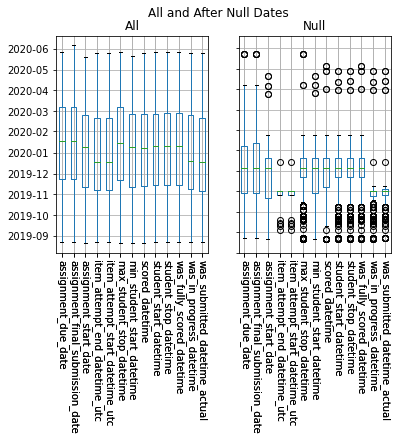

In [16]:
dual_date_boxplot(
    get_random_sample(dfFlt),
    rcNullDf,
    title1='All',
    title2='Null',
    main='All and After Null Dates'
)

- All dates
    - Equal distribution between 8/2019 and 5/2020
- Null dates
    - Majority of nulls between 10/2019 and 1/2020
      - max_student_stop_datetime
      - student_start_datetime
      - student_stop_datetime
      - was_fully_scored_datetime
    - between 10/2019 and 11/2019
      - was_in_progress_datetime
      - was_submitted_datetime_actual
      - item_attempt_start_datetime_utc
      - item_attempt_stop_datetime_utc
- Conclusion
  - Null dates happened between 10/2019 and 11/2019

###### Cross tabulation of response_correctness to raw_score

In [31]:
pdDf =  dfFlt.withColumn('zero_score',
                      F.when( F.col('raw_score').isNull(), 'Null')
                        .when( F.col('raw_score').isNull(), 'Yes')
                        .otherwise('No')
            ).select('zero_score', 'response_correctness').toPandas()

crosstab_percent( pd.crosstab(pdDf.zero_score, pdDf.response_correctness) )

response_correctness,[unassigned],correct,incorrect,partially_correct
zero_score,,,,
No,2.0,57.0,39.0,2.0


- response_correctness strongly correlated with raw_score
- 95%, response_correctness = correct when score is not zero
- 98%, response_correctness = incorrect when score is zero

###### Conclusion
- Remove observations with response_correctness = null
  - items not attempted

In [ ]:
finish_todo('Investigate 3298 null values in response_correctness')

add_todo('Remove 3298 null values in response_correctness')